# 1. Loading the dataset

In [1]:
!mkdir data

Importing libraries

In [2]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

Loading the data

In [3]:
df = pd.read_csv('data/MetroPT3(AirCompressor).csv.zip')

In [4]:
df.head()

,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
0,0,2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1,10,2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2,20,2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
3,30,2020-02-01 00:00:29,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
4,40,2020-02-01 00:00:39,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


# 2. Dataset Analysis

In [5]:
df.shape

(1516948, 17)

We have **1516948** data entries where each is described by 5 features from 7 analogue (1-7) and 8 digital (8-15) sensors.
 <br><br>

 Here are the 17 sensors.

In [6]:
df.columns

Index(['Unnamed: 0', 'timestamp', 'TP2', 'TP3', 'H1', 'DV_pressure',
       'Reservoirs', 'Oil_temperature', 'Motor_current', 'COMP', 'DV_eletric',
       'Towers', 'MPG', 'LPS', 'Pressure_switch', 'Oil_level',
       'Caudal_impulses'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516948 entries, 0 to 1516947
Data columns (total 17 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Unnamed: 0       1516948 non-null  int64  
 1   timestamp        1516948 non-null  object 
 2   TP2              1516948 non-null  float64
 3   TP3              1516948 non-null  float64
 4   H1               1516948 non-null  float64
 5   DV_pressure      1516948 non-null  float64
 6   Reservoirs       1516948 non-null  float64
 7   Oil_temperature  1516948 non-null  float64
 8   Motor_current    1516948 non-null  float64
 9   COMP             1516948 non-null  float64
 10  DV_eletric       1516948 non-null  float64
 11  Towers           1516948 non-null  float64
 12  MPG              1516948 non-null  float64
 13  LPS              1516948 non-null  float64
 14  Pressure_switch  1516948 non-null  float64
 15  Oil_level        1516948 non-null  float64
 16  Caudal_impulses  1

In [8]:
df.describe()

,Unnamed: 0,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
count,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06
mean,7.584735e+06,1.367826e+00,8.984611e+00,7.568155e+00,5.595619e-02,8.985233e+00,6.264418e+01,2.050171e+00,8.369568e-01,1.606106e-01,9.198483e-01,8.326640e-01,3.420025e-03,9.914368e-01,9.041556e-01,9.371066e-01
std,4.379053e+06,3.250930e+00,6.390951e-01,3.333200e+00,3.824015e-01,6.383070e-01,6.516261e+00,2.302053e+00,3.694052e-01,3.671716e-01,2.715280e-01,3.732757e-01,5.838091e-02,9.214078e-02,2.943779e-01,2.427712e-01
min,0.000000e+00,-3.200000e-02,7.300000e-01,-3.600000e-02,-3.200000e-02,7.120000e-01,1.540000e+01,2.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.792368e+06,-1.400000e-02,8.492000e+00,8.254000e+00,-2.200000e-02,8.494000e+00,5.777500e+01,4.000000e-02,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
50%,7.584735e+06,-1.200000e-02,8.960000e+00,8.784000e+00,-2.000000e-02,8.960000e+00,6.270000e+01,4.500000e-02,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
75%,1.137710e+07,-1.000000e-02,9.492000e+00,9.374000e+00,-1.800000e-02,9.492000e+00,6.725000e+01,3.807500e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
max,1.516947e+07,1.067600e+01,1.030200e+01,1.028800e+01,9.844000e+00,1.030000e+01,8.905000e+01,9.295000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


# 3. EDA
Data Visualization for gaining insights.

## 3.1) Plotting the time series

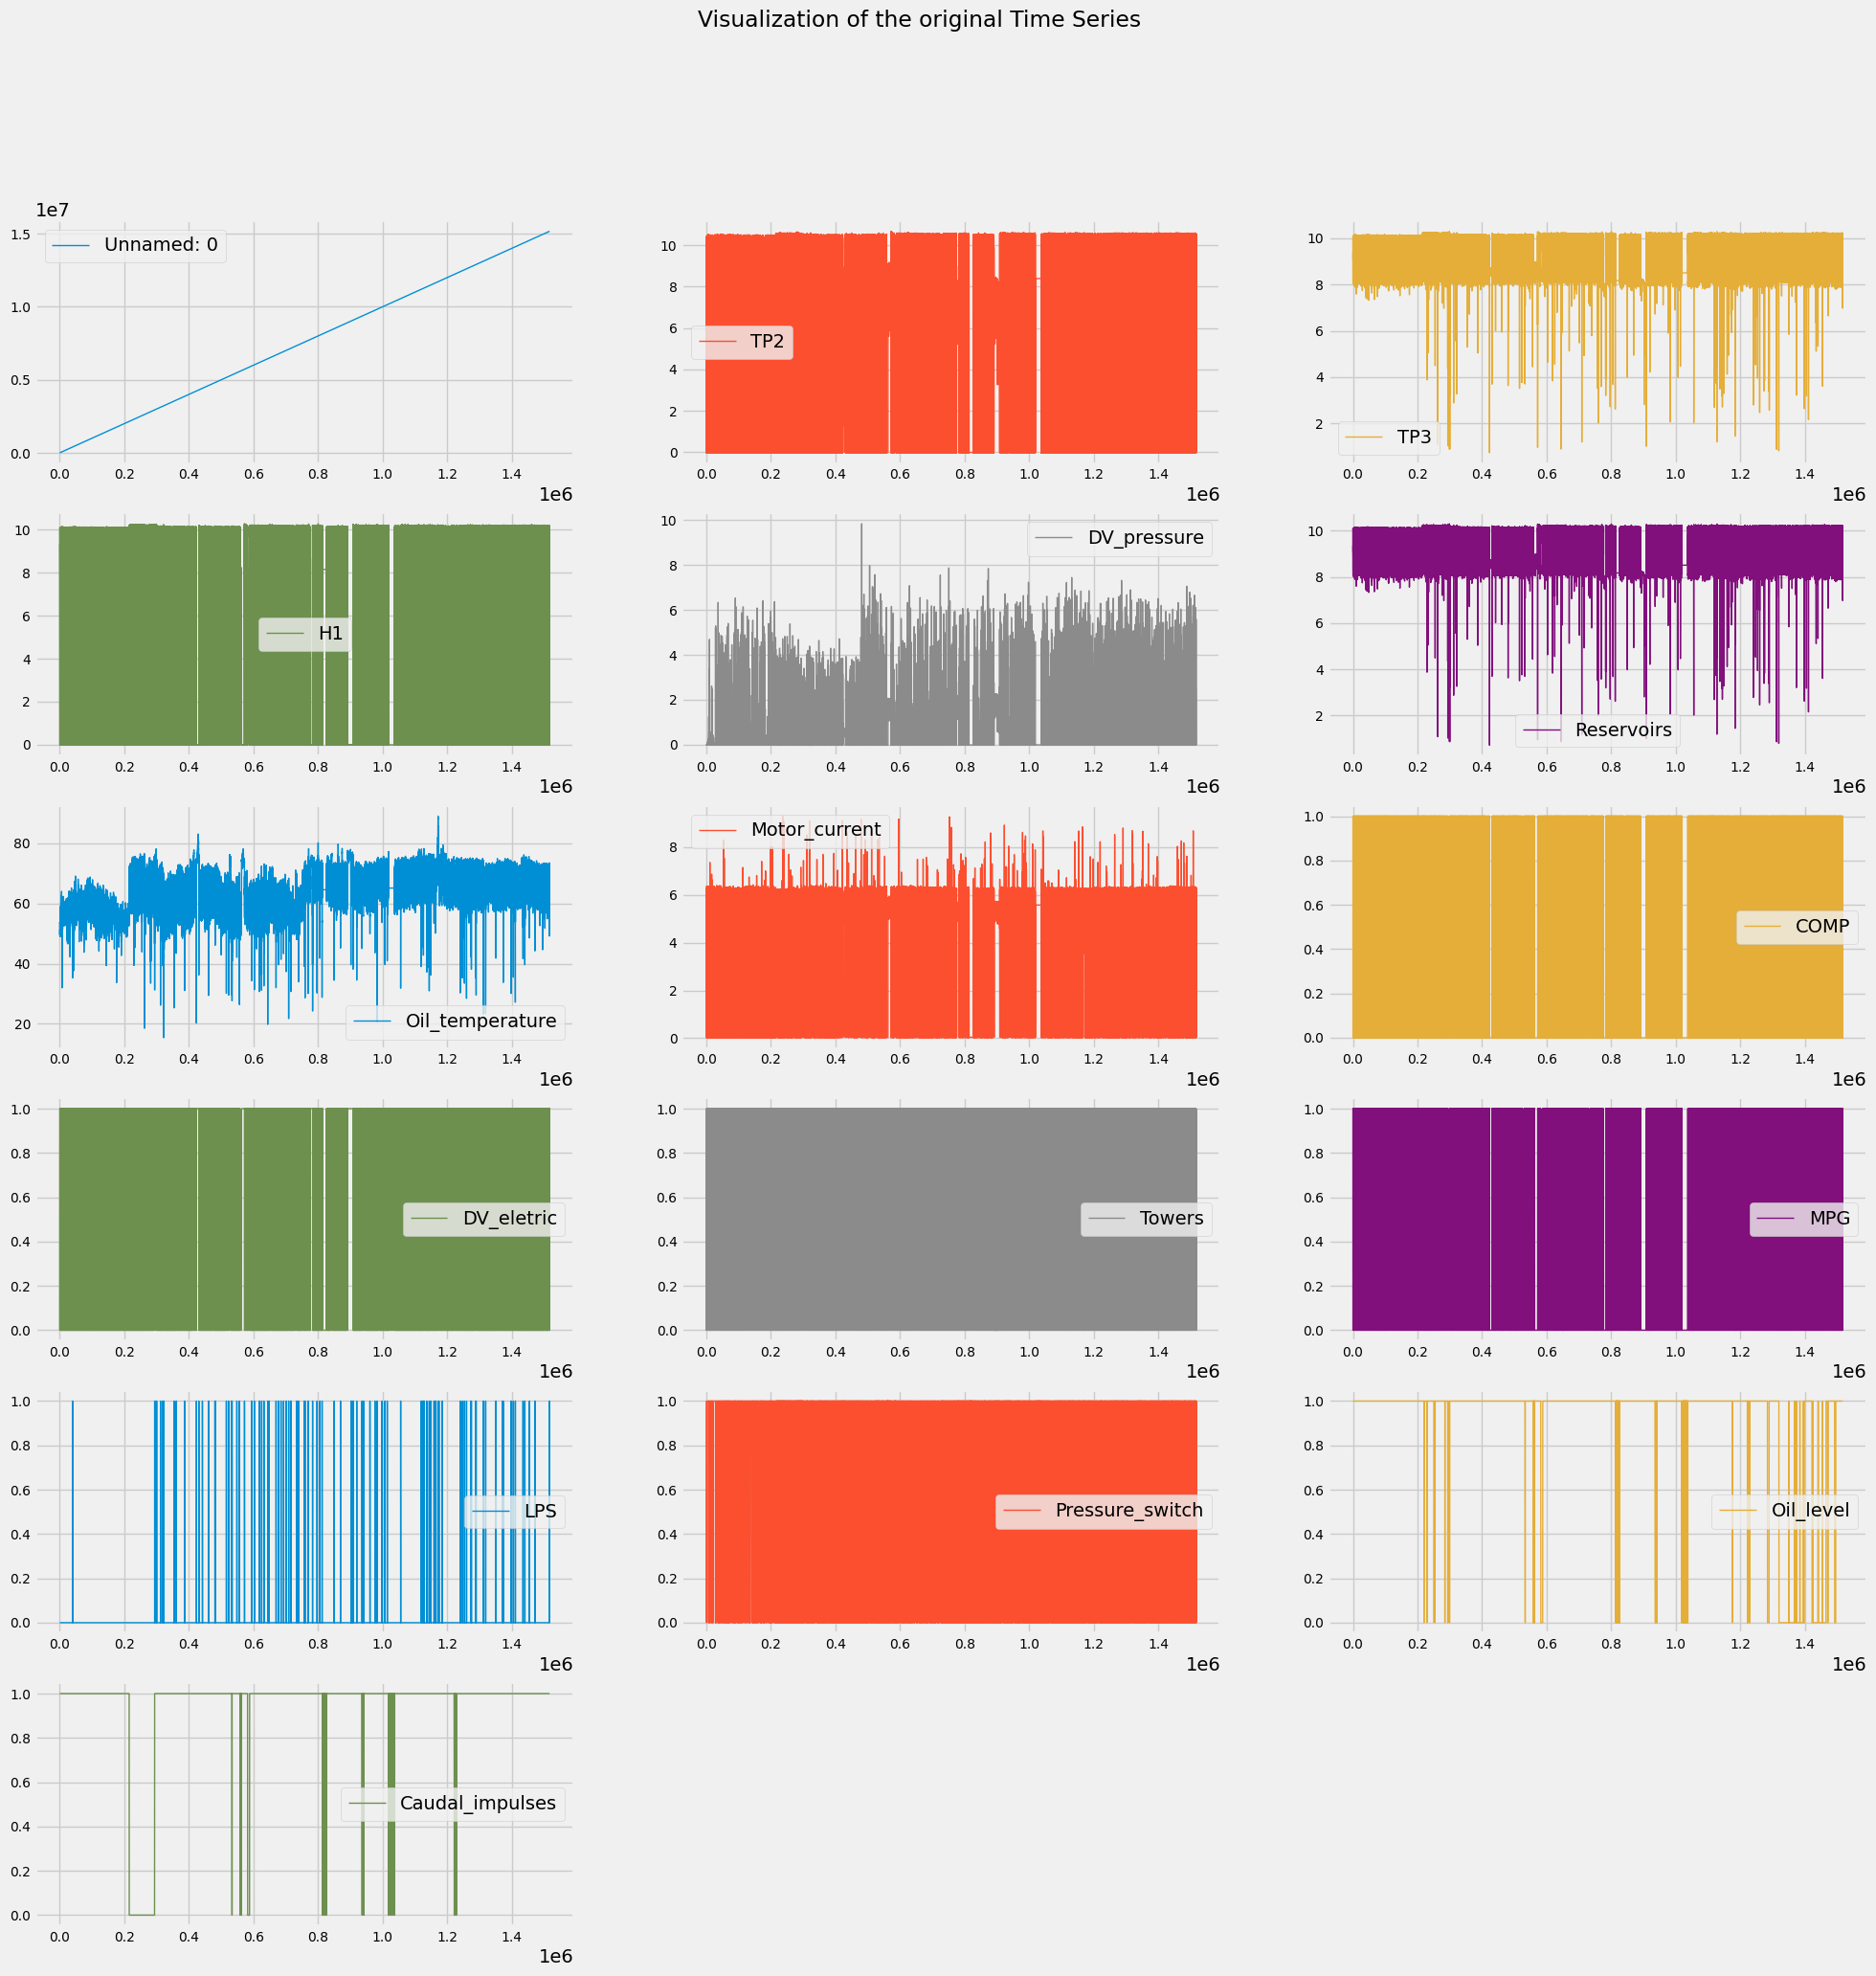

In [9]:
plt.style.use('fivethirtyeight')
df.plot(subplots=True,
        layout=(6, 3),
        figsize=(22,22),
        fontsize=10,
        linewidth=1,
        sharex=False,
        title='Visualization of the original Time Series')
plt.show()

##3.2 Visualizing the distribution of values of Pressure Columns

TP2:<br>
The measure of the pressure on the compressor.


TP3:<br>
The measure of the pressure generated at the pneumatic panel.

H1:<br>
The measure of the pressure generated due to pressure drop when the discharge of the cyclonic separator filter occurs.

DV_pressure:<br>
The measure of the pressure drop generated when the towers discharge air dryers; a zero reading indicates that the compressor is operating under load.

Reservoirs:<br>
The measure of the downstream pressure of the reservoirs, which should be close to the pneumatic panel pressure

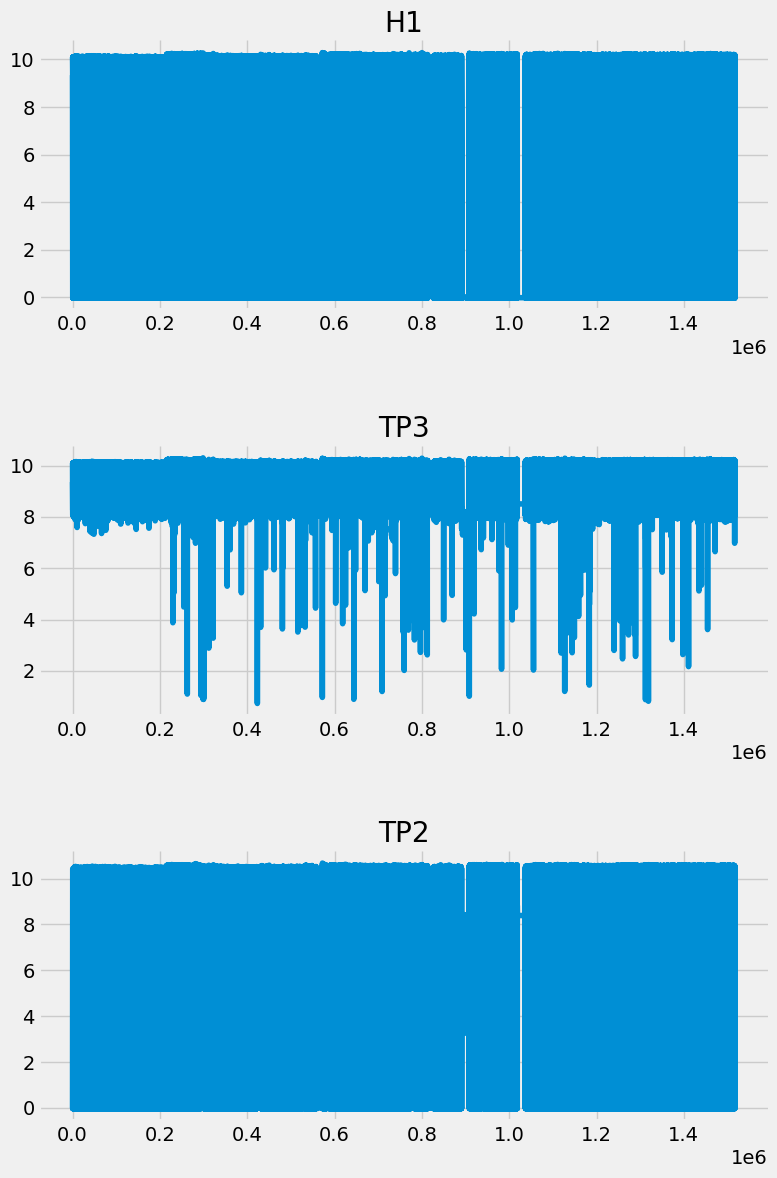

In [10]:
def value_plot(df, y, figscale=1, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(8 * figscale, 4 * figscale))
    df[y].plot(kind='line', ax=ax, title=y)
    ax.spines[['top', 'right']].set_visible(False)
    plt.tight_layout()

# Create a figure with three subplots arranged in a single column
fig, axes = plt.subplots(3, 1, figsize=(8, 12))  # 3 rows, 1 column

# Plot the first dataframe in the first subplot
value_plot(df, 'H1', ax=axes[0])

# Plot the second dataframe in the second subplot
value_plot(df, 'TP3', ax=axes[1])

# Plot the third dataframe in the third subplot
value_plot(df, 'TP2', ax=axes[2])

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Show the plots
plt.show()


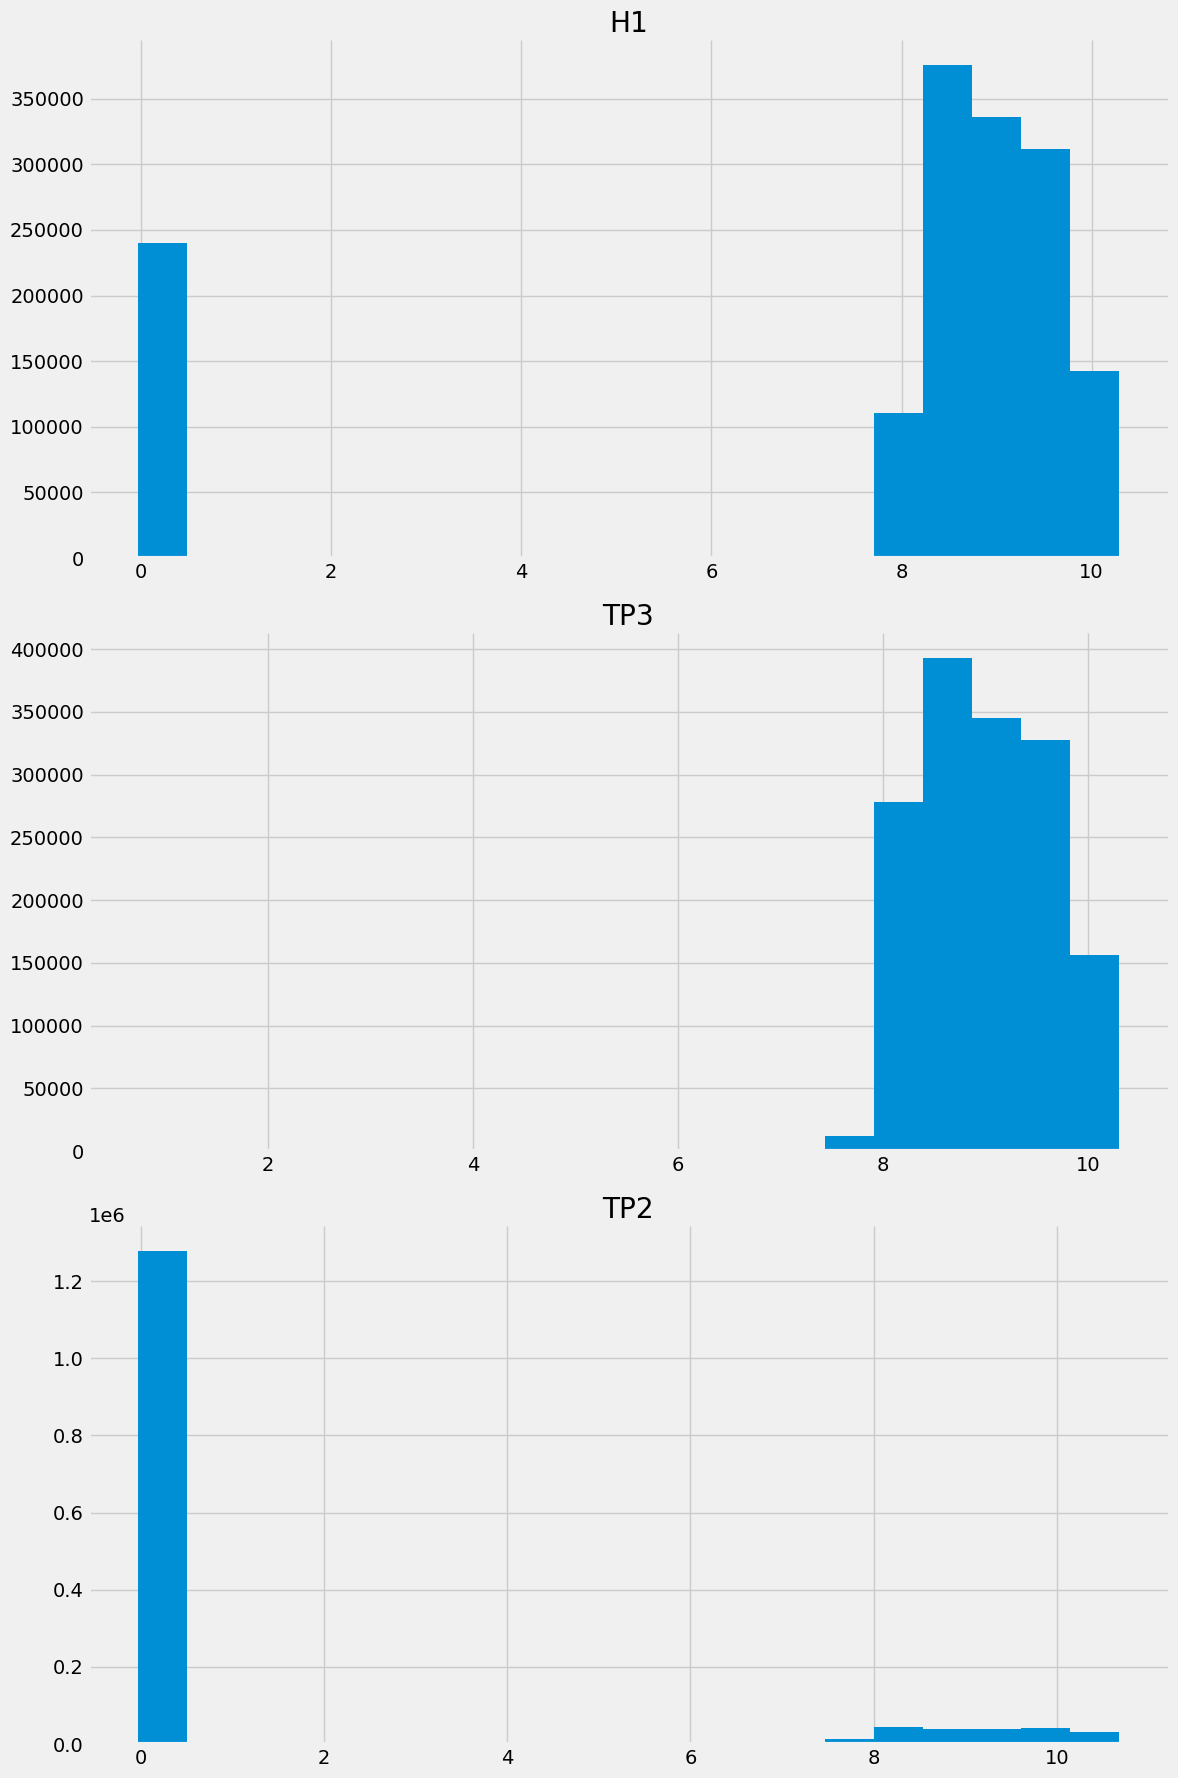

In [11]:
def histogram(df, colname, num_bins=20, figscale=1):
    from matplotlib import pyplot as plt
    plt.hist(df[colname], bins=num_bins)
    plt.title(colname)
    plt.gca().spines[['top', 'right']].set_visible(False)

# Create a figure with three subplots arranged in a single column
fig, axes = plt.subplots(3, 1, figsize=(12, 18))  # 3 rows, 1 column

# Create subplots for each histogram
plt.subplot(3, 1, 1)
histogram(df, 'H1')

plt.subplot(3, 1, 2)
histogram(df, 'TP3')

plt.subplot(3, 1, 3)
histogram(df, 'TP2')

# Adjust spacing between subplots
plt.tight_layout()

# Show the combined histogram plot
plt.show()


Now representing these in 2d arrays that helps us understand how the attribute values are changing with respect to each other using scatter plots.

In [12]:
from google.colab import autoviz
def scatter_plots(df, colname_pairs, figscale=1, alpha=0.8):
    from matplotlib import pyplot as plt
    num_plots = len(colname_pairs)
    plt.figure(figsize=(6 * figscale, num_plots * 6 * figscale))

    for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
        ax = plt.subplot(num_plots, 1, plot_i)
        df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
        ax.spines[['top', 'right']].set_visible(False)

    plt.tight_layout()
    return autoviz.MplChart.from_current_mpl_state()

# Example usage:
chart = scatter_plots(df, [ ['TP2', 'TP3'], ['TP3', 'H1'], ['H1', 'DV_pressure']])
chart

##Using BOX PLOTS
A box and whisker plot or diagram (otherwise known as a boxplot), is a graph summarising a set of data. The shape of the boxplot shows how the data is distributed and it also shows any outliers. It is a useful way to compare different sets of data as you can draw more than one boxplot per graph.

So throught box plot we get the basic idea of the distribution of data values within the respective ranges.

THE MEDIAN IS REPRESENTED BY THE HORIZONTAL LINE.

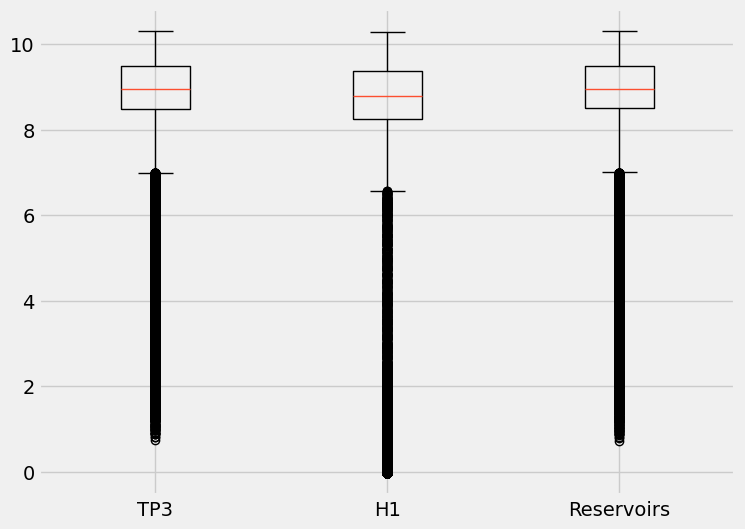

In [13]:
plt.figure(figsize=(8, 6))
plt.boxplot([df['TP3'], df['H1'], df['Reservoirs']], labels=['TP3', 'H1', 'Reservoirs'])
plt.grid(True)
plt.show()

Now highlighting the median for the above attributes:

1) TP3 (The measure of the pressure generated at the pneumatic panel) : <br>

8.96

2) H1 (the measure of the pressure generated due to pressure drop when the discharge of the cyclonic separator filter occurs) : <br>

8.78

3) Reservoirs (the measure of the downstream pressure of the reservoirs, which should be close to the pneumatic panel pressure) : <br>

8.96


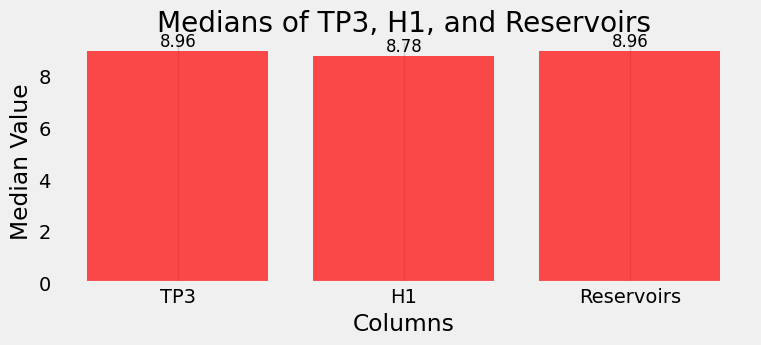

In [14]:
# Calculate the medians for each column
medians = [df['TP3'].median(), df['H1'].median(), df['Reservoirs'].median()]

plt.figure(figsize=(8, 3))
plt.bar(['TP3', 'H1', 'Reservoirs'], medians, color='red', alpha=0.7)
plt.title('Medians of TP3, H1, and Reservoirs')
plt.xlabel('Columns')
plt.ylabel('Median Value')
plt.grid(axis='y')

# Add labels with median values to the bar chart
for i, median in enumerate(medians):
    plt.text(i, median + 0.02, f'{median:.2f}', ha='center', va='bottom', fontsize=12)
# Show both plots
plt.show()

The results are as expected , the measure of the pressure generated at the pneumatic panel is almost equal to the measure of the downstream pressure of the reservoirs.


Now just analysing though  "**DIFFERENTIAL PLOT**"  the slight deviations from the ideal case

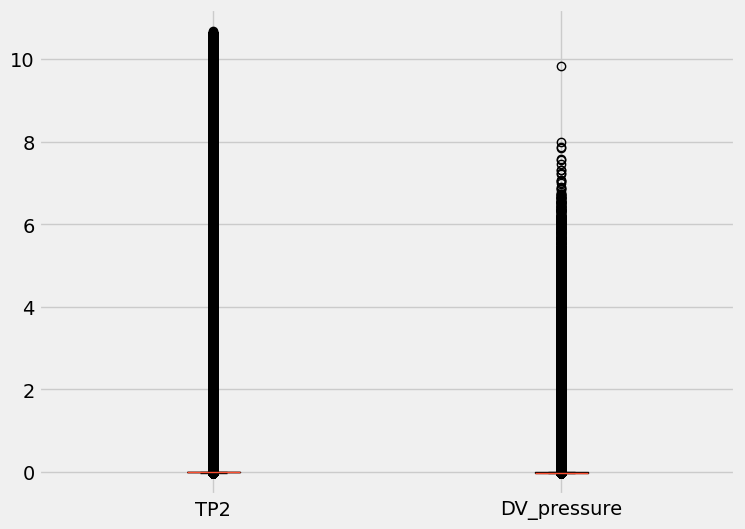

In [15]:
plt.figure(figsize=(8, 6))
plt.boxplot([df['TP2'], df['DV_pressure']], labels=['TP2' , 'DV_pressure'])
plt.grid(True)
plt.show()

Now highlighting the median for the above attributes:

1) TP2 (the measure of the pressure on the compressor) :

-0.0120

2) DV_pressure (the measure of the pressure generated at the pneumatic panel) :

-0.0200




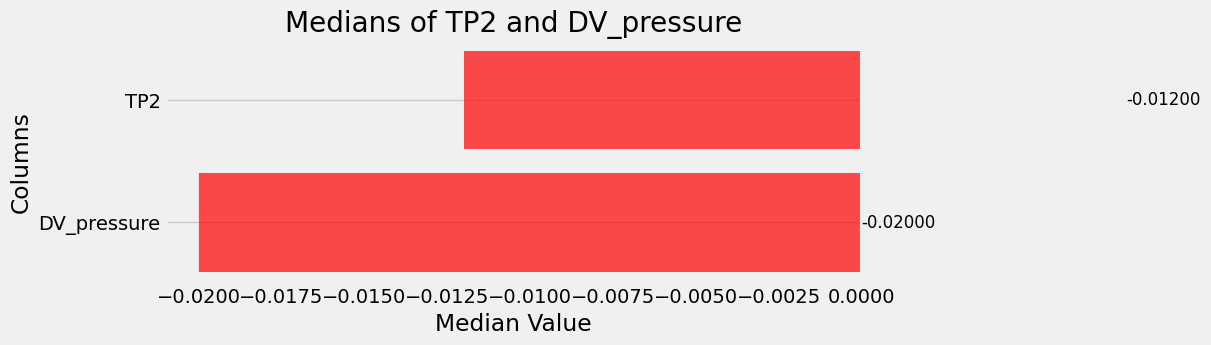

In [16]:
medians = [df['TP2'].median(), df['DV_pressure'].median()]

plt.figure(figsize=(8, 3))

# Create a horizontal bar plot
bar_plot = plt.barh(['TP2', 'DV_pressure'], medians, color='red', alpha=0.7)  # Use barh for horizontal bars

plt.title('Medians of TP2 and DV_pressure')
plt.xlabel('Median Value')
plt.ylabel('Columns')

for i, median in enumerate(medians):
    plt.text(median + 0.02, i, f'{median:.5f}', va='center', fontsize=12)

plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.show()


Now plotting summary statistics for all the pressure columns.

Summary statistics for TP2:
count    1.516948e+06
mean     1.367826e+00
std      3.250930e+00
min     -3.200000e-02
25%     -1.400000e-02
50%     -1.200000e-02
75%     -1.000000e-02
max      1.067600e+01
Name: TP2, dtype: float64


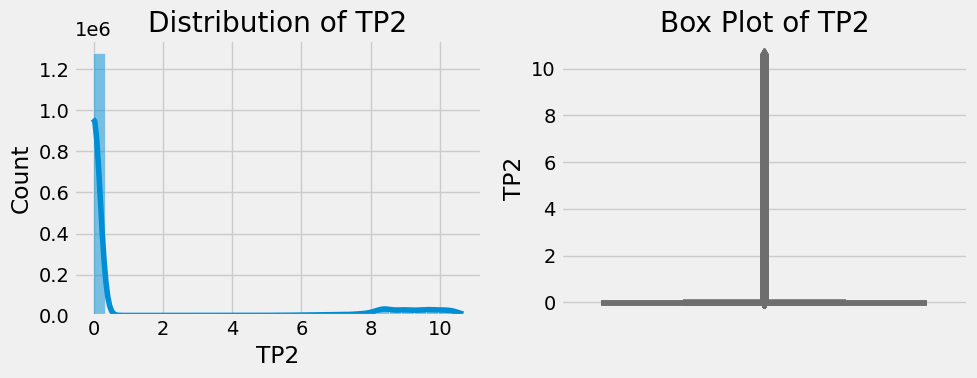

Summary statistics for TP3:
count    1.516948e+06
mean     8.984611e+00
std      6.390951e-01
min      7.300000e-01
25%      8.492000e+00
50%      8.960000e+00
75%      9.492000e+00
max      1.030200e+01
Name: TP3, dtype: float64


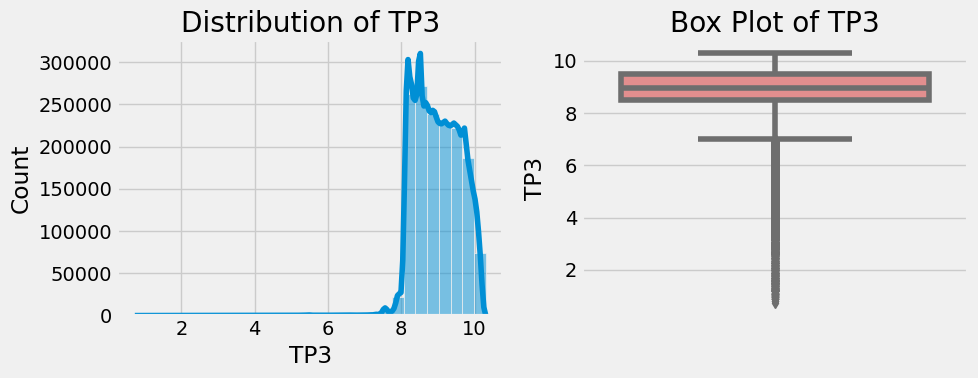

Summary statistics for H1:
count    1.516948e+06
mean     7.568155e+00
std      3.333200e+00
min     -3.600000e-02
25%      8.254000e+00
50%      8.784000e+00
75%      9.374000e+00
max      1.028800e+01
Name: H1, dtype: float64


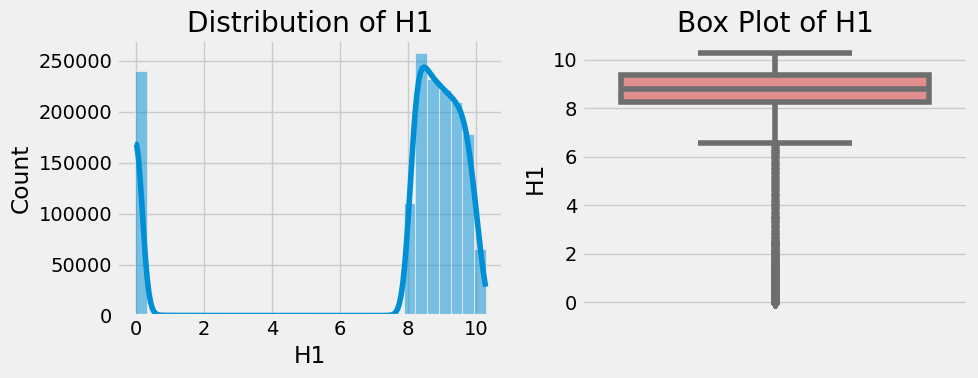

Summary statistics for DV_pressure:
count    1.516948e+06
mean     5.595619e-02
std      3.824015e-01
min     -3.200000e-02
25%     -2.200000e-02
50%     -2.000000e-02
75%     -1.800000e-02
max      9.844000e+00
Name: DV_pressure, dtype: float64


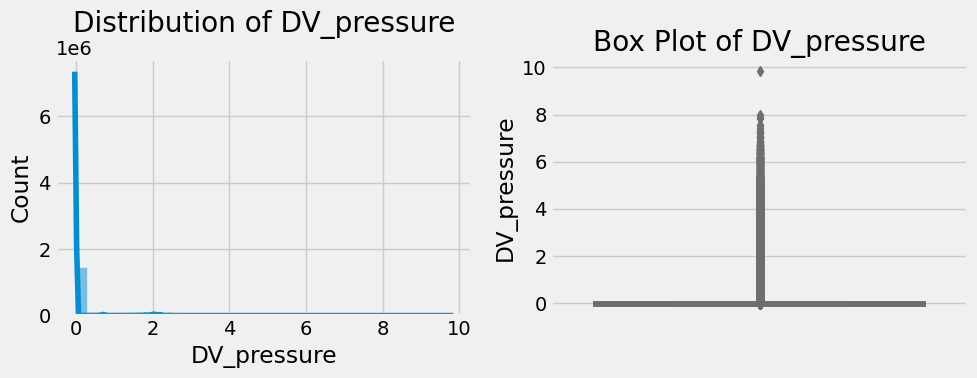

Summary statistics for Reservoirs:
count    1.516948e+06
mean     8.985233e+00
std      6.383070e-01
min      7.120000e-01
25%      8.494000e+00
50%      8.960000e+00
75%      9.492000e+00
max      1.030000e+01
Name: Reservoirs, dtype: float64


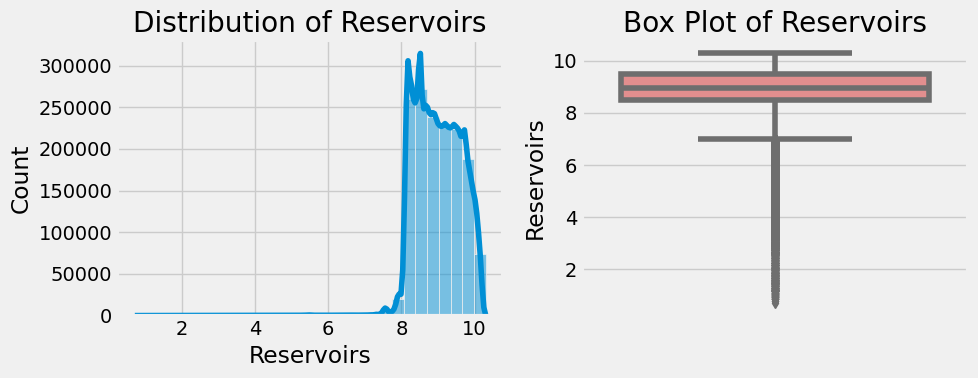

In [17]:
import seaborn as sns
# Pressure Columns (TP2, TP3, H1, DV_pressure, Reservoirs)
pressure_columns = ['TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs']
# Summary statistics and distributions
for col in pressure_columns:
    print(f"Summary statistics for {col}:")
    print(df[col].describe())
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df, y=col, color='lightcoral')
    plt.title(f'Box Plot of {col}')
    plt.tight_layout()
    plt.show()

Now, plotting probability distribution function for each pressure attribute.

Each subplot displays the PDF and includes annotations for the following key points:

1.The maximum PDF value and its corresponding x-coordinate.<br>
2.The mean of the distribution.<br>
3.The standard deviation of the distribution.

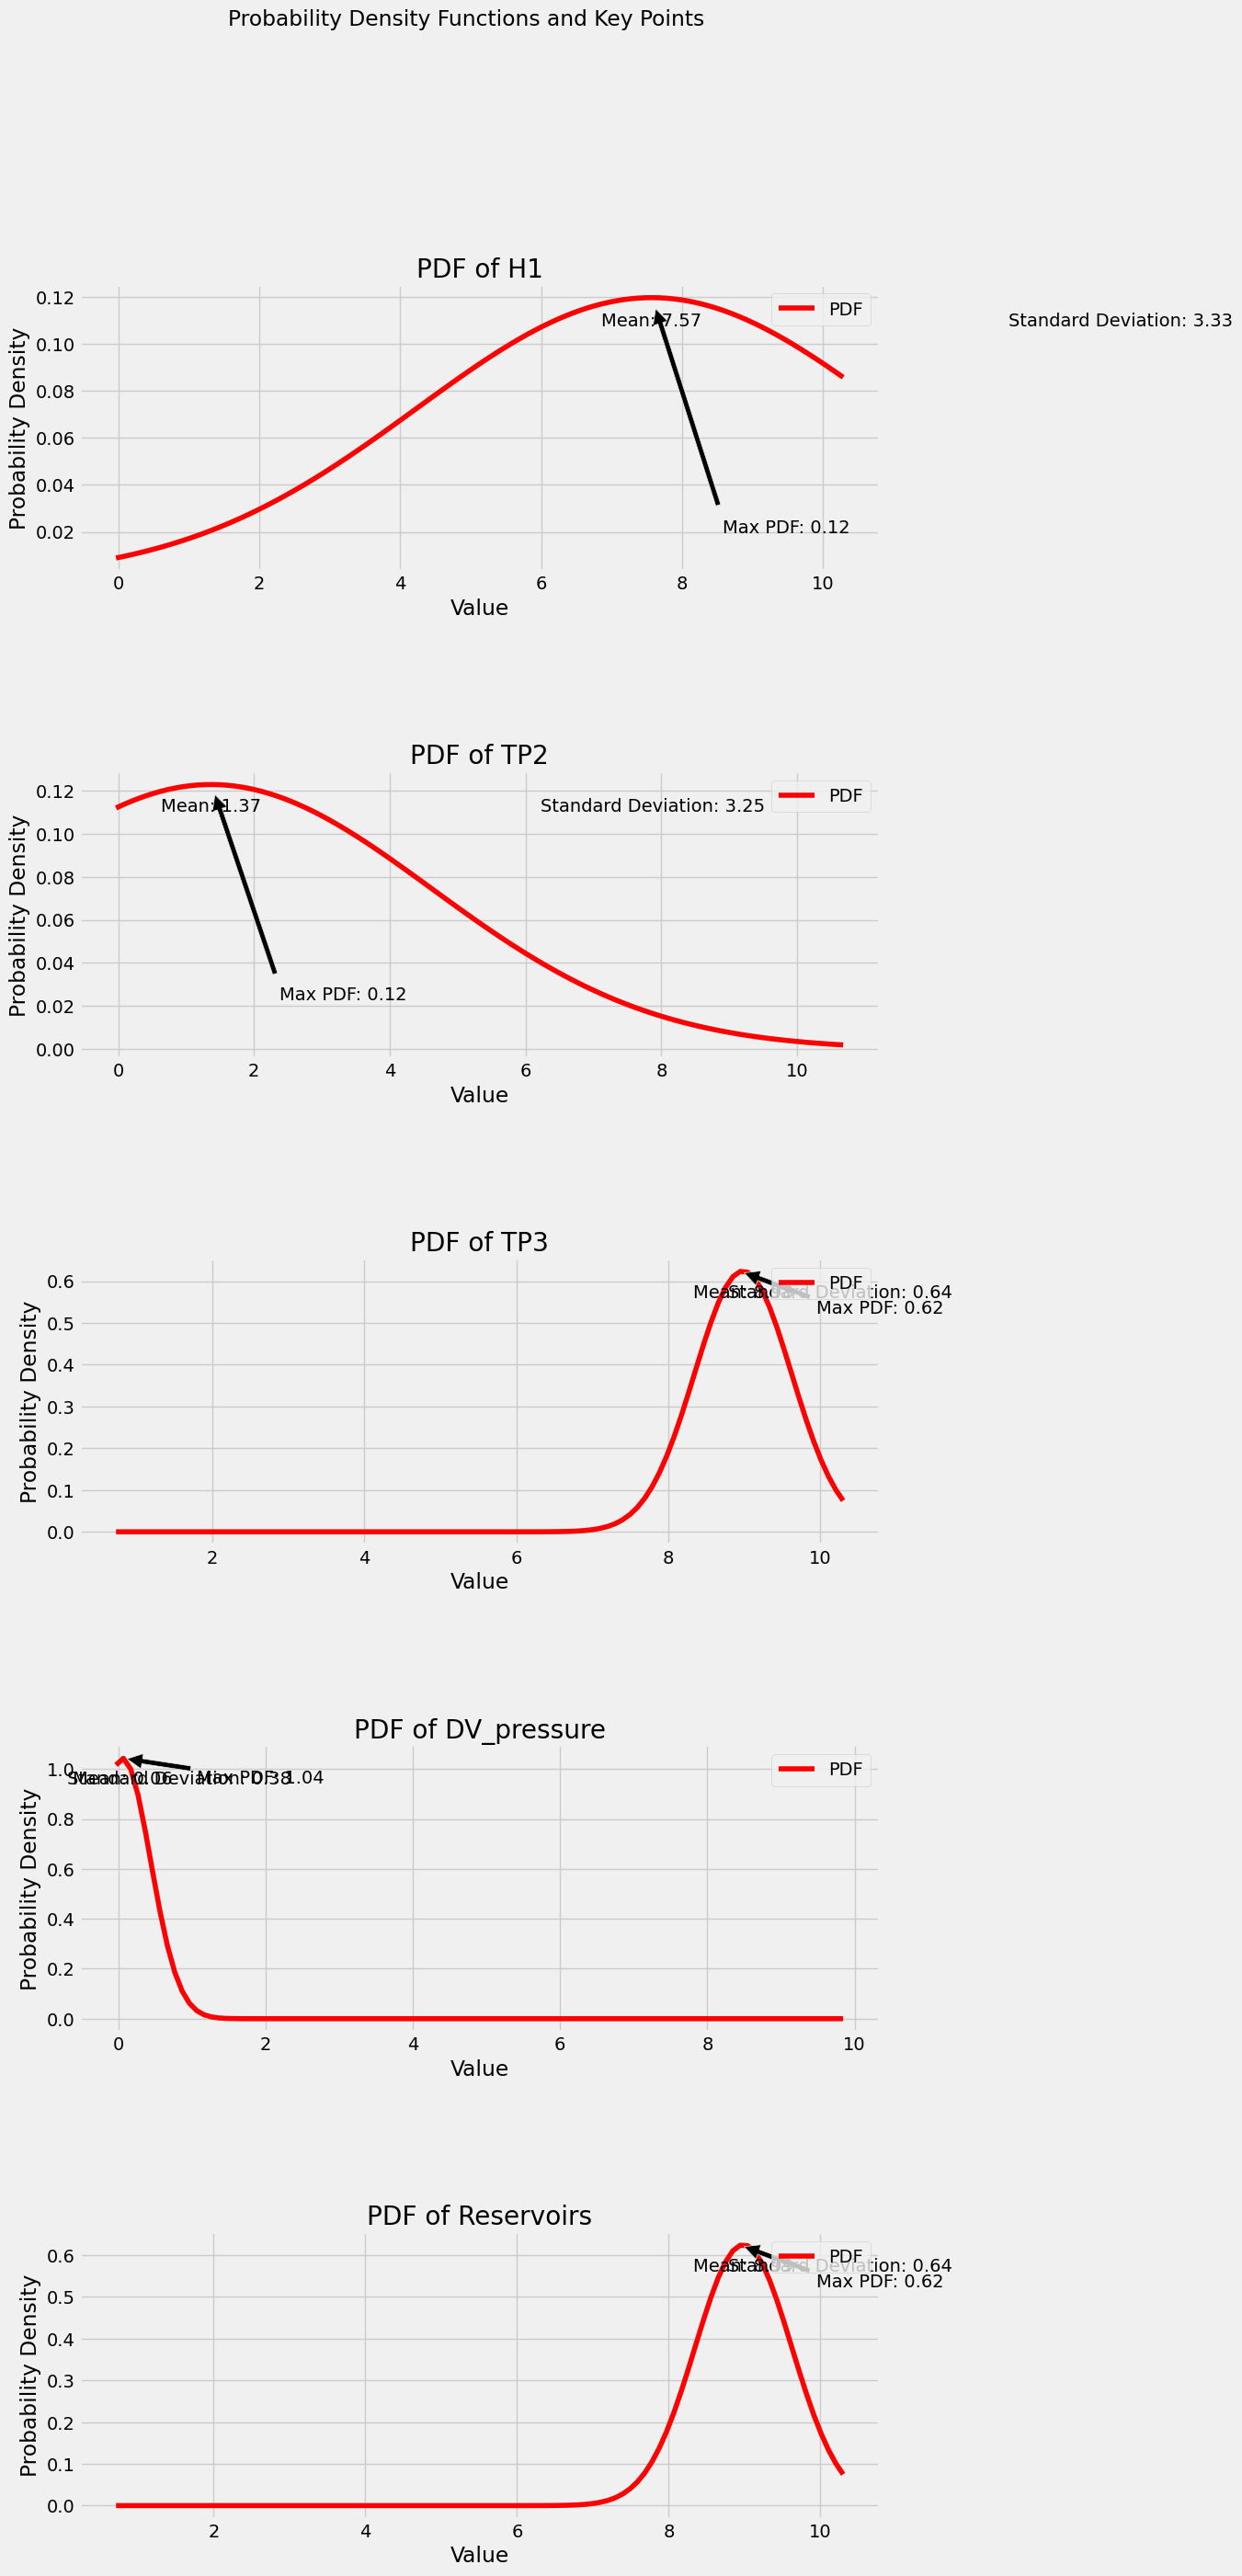

In [18]:
from scipy.stats import norm

columns_to_plot = ['H1', 'TP2', 'TP3', 'DV_pressure', 'Reservoirs']

num_columns = len(columns_to_plot)
fig, axes = plt.subplots(num_columns, 1, figsize=(10, 6 * num_columns))

plt.subplots_adjust(hspace=0.7)

for i, col in enumerate(columns_to_plot):
    ax = axes[i]

    data = df[col]

    x_range = np.linspace(min(data), max(data), 100)

    mean = np.mean(data)
    std_dev = np.std(data)
    pdf = norm.pdf(x_range, mean, std_dev)


    ax.plot(x_range, pdf, 'r-', label='PDF')
    ax.set_title(f'PDF of {col}')

    ax.set_xlabel('Value')
    ax.set_ylabel('Probability Density')
    ax.legend()

    max_pdf_value = np.max(pdf)
    max_pdf_index = np.argmax(pdf)
    ax.annotate(f'Max PDF: {max_pdf_value:.2f}', xy=(x_range[max_pdf_index], max_pdf_value),
                xytext=(x_range[max_pdf_index] + 1, max_pdf_value - 0.1),
                arrowprops=dict(facecolor='black', shrink=0.05))

    ax.text(mean, 0.9 * max_pdf_value, f'Mean: {mean:.2f}', ha='center')
    ax.text(mean + 2 * std_dev, 0.9 * max_pdf_value, f'Standard Deviation: {std_dev:.2f}', ha='center')

plt.suptitle('Probability Density Functions and Key Points')

plt.show()




**Plotting pairplots**

Correlation between H1 and TP2: -0.00 (weak correlation)
Correlation between H1 and TP3: -0.00 (weak correlation)
Correlation between H1 and DV_pressure: 0.01 (weak correlation)
Correlation between H1 and Reservoirs: -0.00 (weak correlation)
Correlation between TP2 and TP3: 0.00 (weak correlation)
Correlation between TP2 and DV_pressure: 0.00 (weak correlation)
Correlation between TP2 and Reservoirs: 0.00 (weak correlation)
Correlation between TP3 and DV_pressure: 0.00 (weak correlation)
Correlation between TP3 and Reservoirs: -0.00 (weak correlation)
Correlation between DV_pressure and Reservoirs: 0.00 (weak correlation)


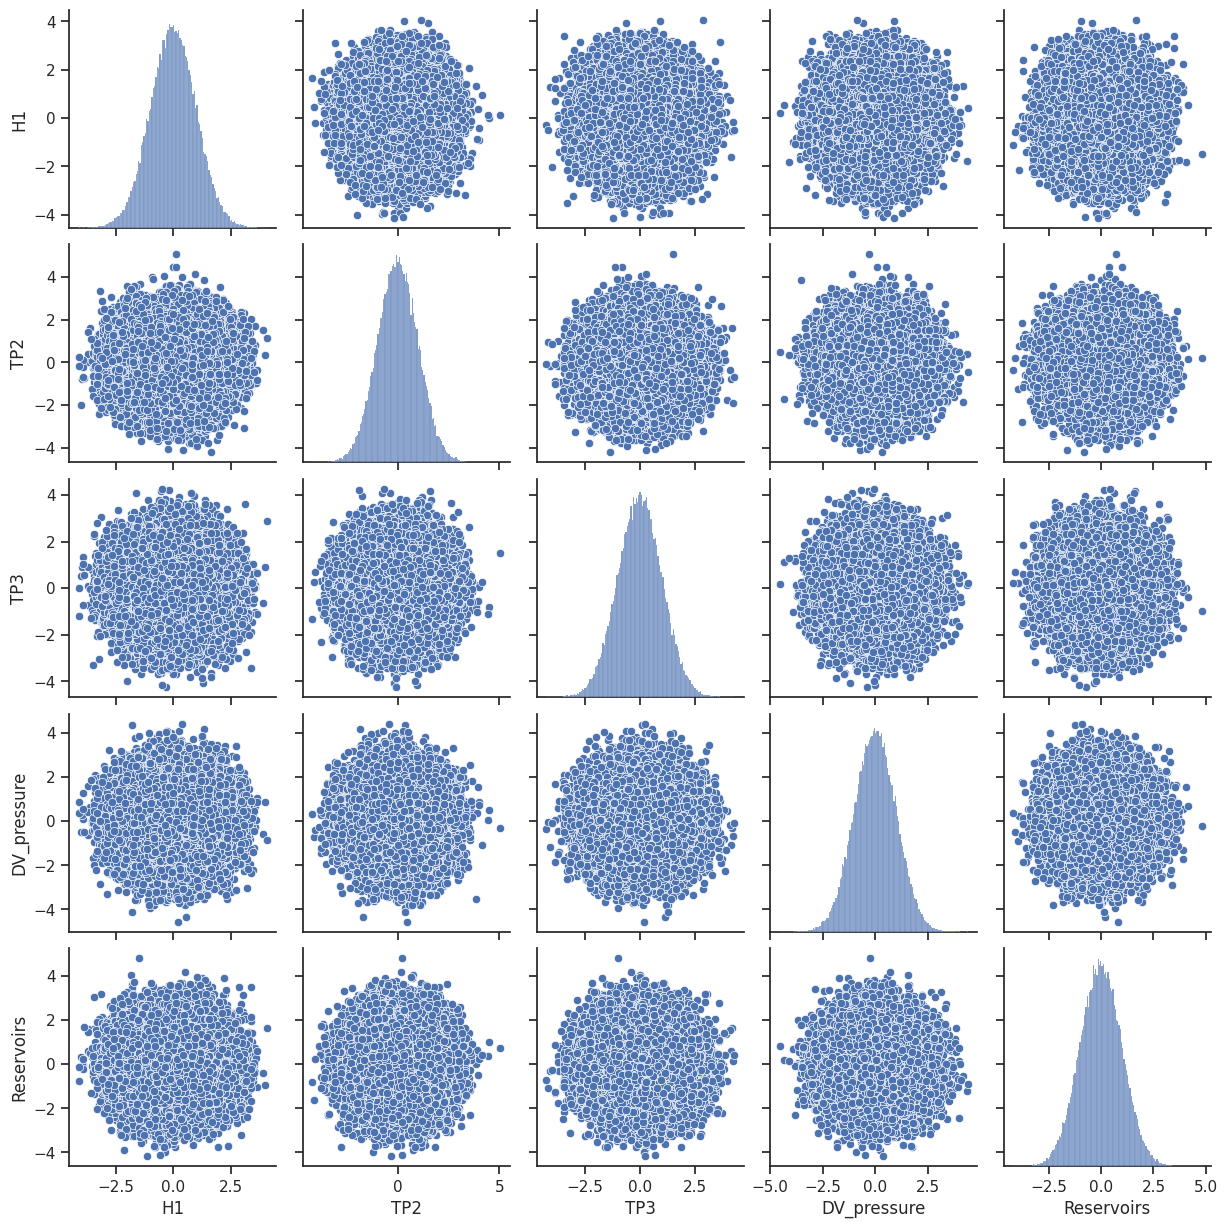

In [19]:
columns_to_plot = ['H1', 'TP2', 'TP3', 'DV_pressure', 'Reservoirs']

data = pd.DataFrame({col: np.random.randn(100000) for col in columns_to_plot})

sns.set(style="ticks")
pairplot = sns.pairplot(data)

correlation_matrix = data.corr()

for i, col1 in enumerate(columns_to_plot):
    for j, col2 in enumerate(columns_to_plot):
        if i < j:
            corr = correlation_matrix.loc[col1, col2]
            if abs(corr) >= 0.5:
                print(f'Correlation between {col1} and {col2}: {corr:.2f} (strong correlation)')
            else:
                print(f'Correlation between {col1} and {col2}: {corr:.2f} (weak correlation)')

# Show the pairplot
plt.show()

The above scatter plots of all pairs provides an analysis of the correlation strength, classifying it as either "strong" or "weak" based on an absolute correlation threshold of "0.5".

## Skewed or not Skewed Distribution?
What is skewed distribution?

A skewed distribution will exhibit a tail that is longer on one side, which can be seen in the plot.A Skewed data is assymetric about it's mean.

Why checking for skewed data?

Skewness is a statistical measure that quantifies the asymmetry of the data distribution.


####-> Now again plotting the histogram and density plot to show whether the distribution is skewed or not. If skewed then "positive skewed" or "negative skewed".

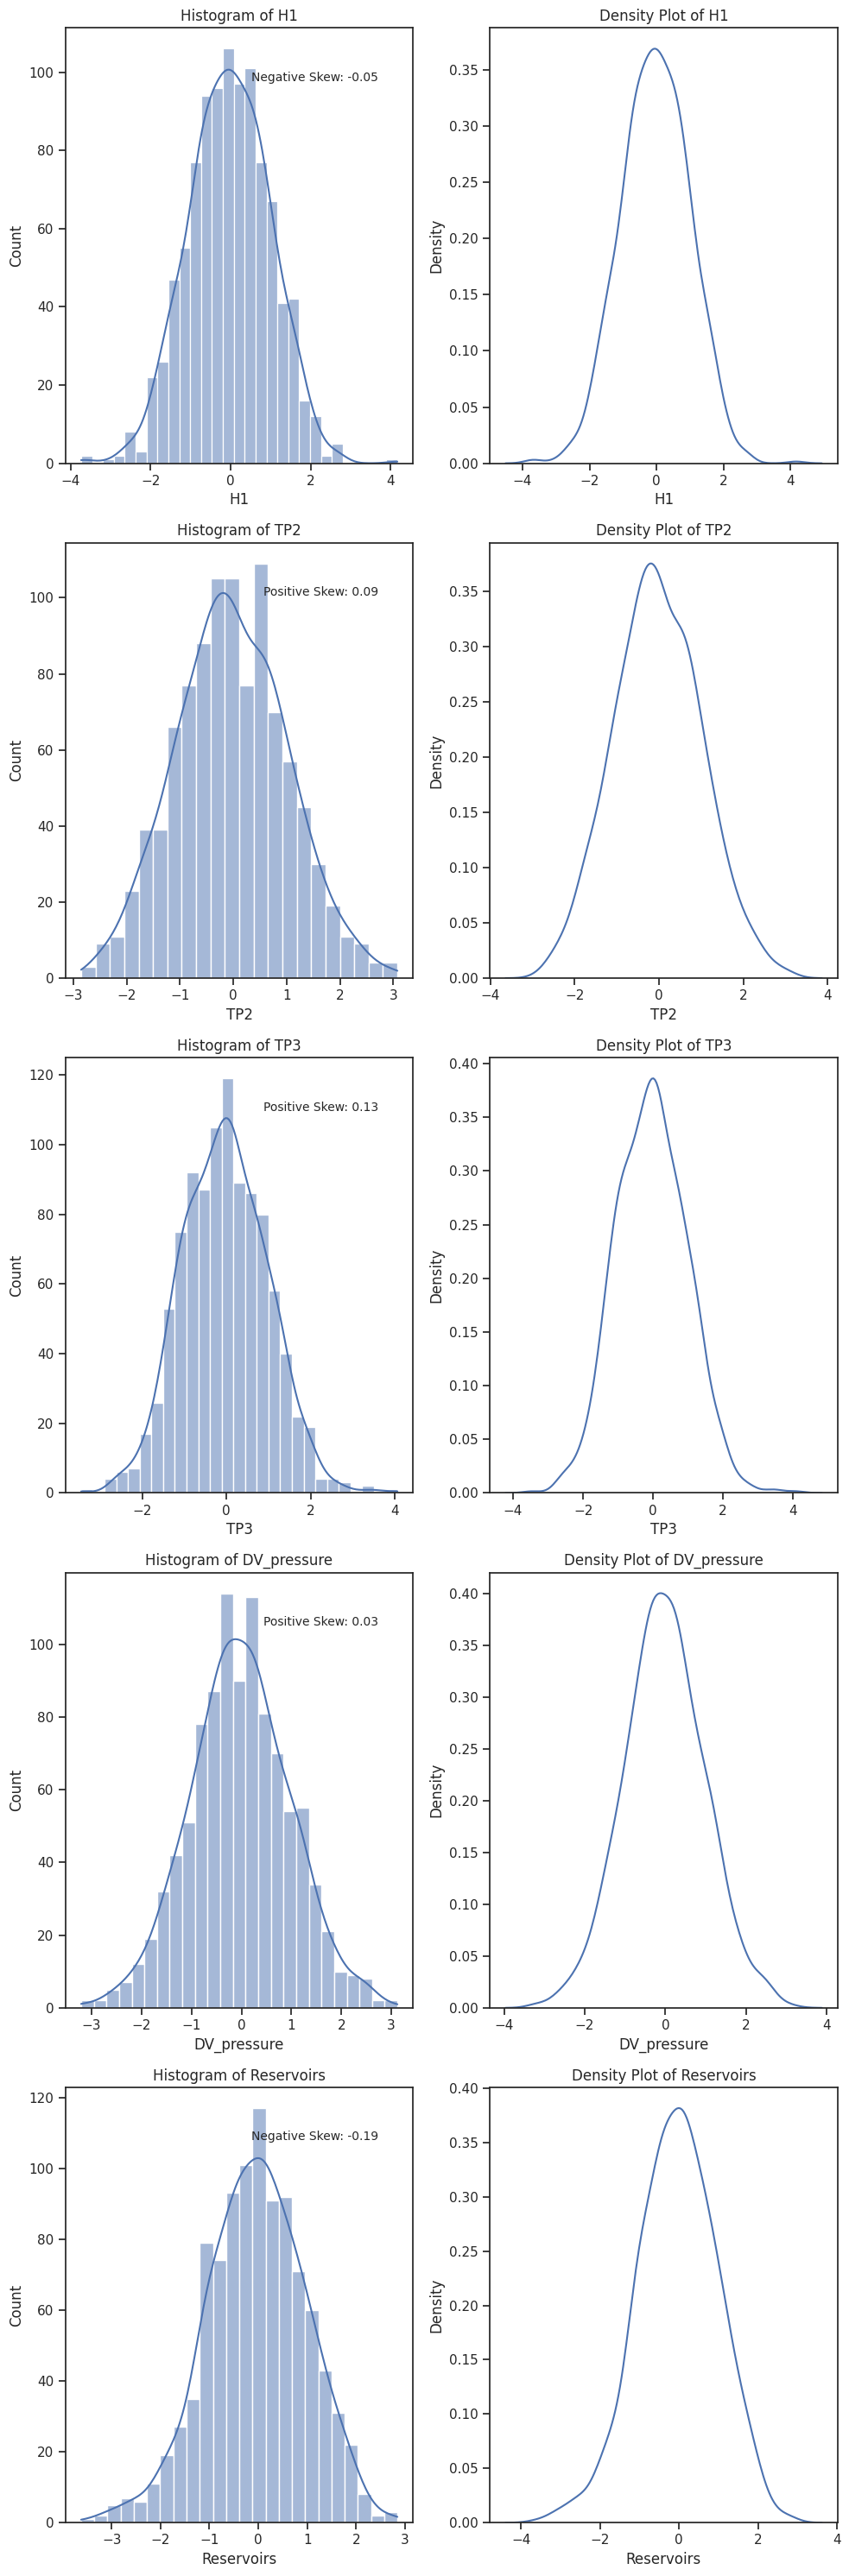

In [20]:
from scipy.stats import skew

# Columns to analyze for skewness
columns_to_analyze = ['H1', 'TP2', 'TP3', 'DV_pressure', 'Reservoirs']

# Create a DataFrame with these columns (replace this with your actual data)
data = pd.DataFrame({col: np.random.randn(1000) for col in columns_to_analyze})

# Create subplots for histograms and density plots
num_columns = len(columns_to_analyze)
fig, axes = plt.subplots(num_columns, 2, figsize=(10, 6*num_columns))

for i, col in enumerate(columns_to_analyze):
    ax_hist = axes[i, 0]
    ax_density = axes[i, 1]

    # Plot histogram
    sns.histplot(data[col], kde=True, ax=ax_hist)
    ax_hist.set_title(f'Histogram of {col}')

    # Plot density plot
    sns.kdeplot(data[col], ax=ax_density)
    ax_density.set_title(f'Density Plot of {col}')

    # Calculate skewness
    skewness = skew(data[col])
    if skewness > 0:
        skewness_text = f'Positive Skew: {skewness:.2f}'
    elif skewness < 0:
        skewness_text = f'Negative Skew: {skewness:.2f}'
    else:
        skewness_text = 'No Skew'

    ax_hist.text(0.9, 0.9, skewness_text, transform=ax_hist.transAxes, ha='right', va='top', fontsize=10)

plt.tight_layout()
plt.show()


Plotting scatterplot

<Axes: xlabel='TP3', ylabel='Reservoirs'>

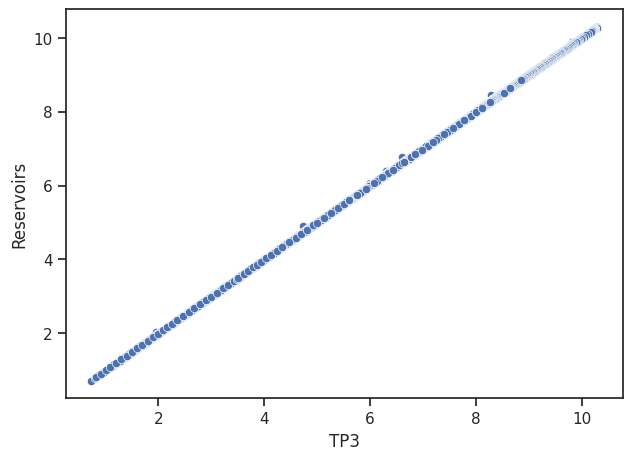

In [21]:
sns.scatterplot(x=df["TP3"], y=df["Reservoirs"])

#####The Pressure values of TP3 and Reservoir comes out to be same as **expected**.

## 3.3 Oil Temperature:
   - The oil temperature appears to follow a roughly normal distribution.
   - There are no extreme outliers.

### Median for Oil Temperature using **Box Plot**

<function matplotlib.pyplot.show(close=None, block=None)>

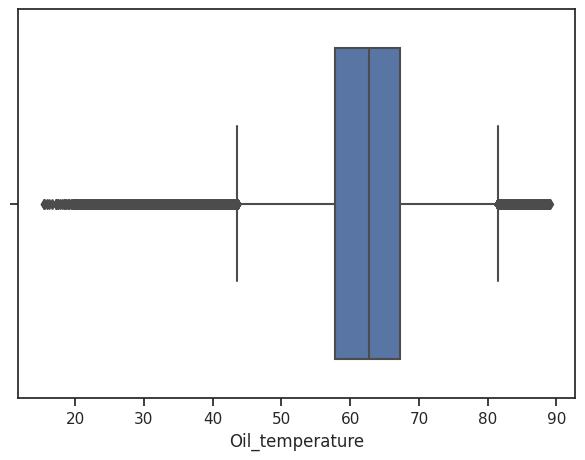

In [22]:
sns.boxplot(x='Oil_temperature', data=df)
plt.show

In [23]:
# Calculate the median of the data
median = df['Oil_temperature'].median()
print("Median value of oil Temperature is ", median)# Add a vertical line at the median


Median value of oil Temperature is  62.7


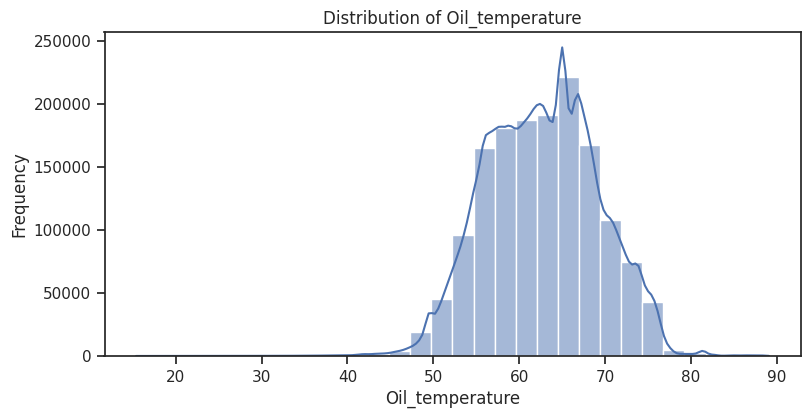

In [24]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Oil_temperature'], bins=30, kde=True)
plt.title('Distribution of Oil_temperature')
plt.xlabel('Oil_temperature')
plt.ylabel('Frequency')
plt.show()

## 3.4 Correlation Heatmap for these Pressure Columns and Oil temperature

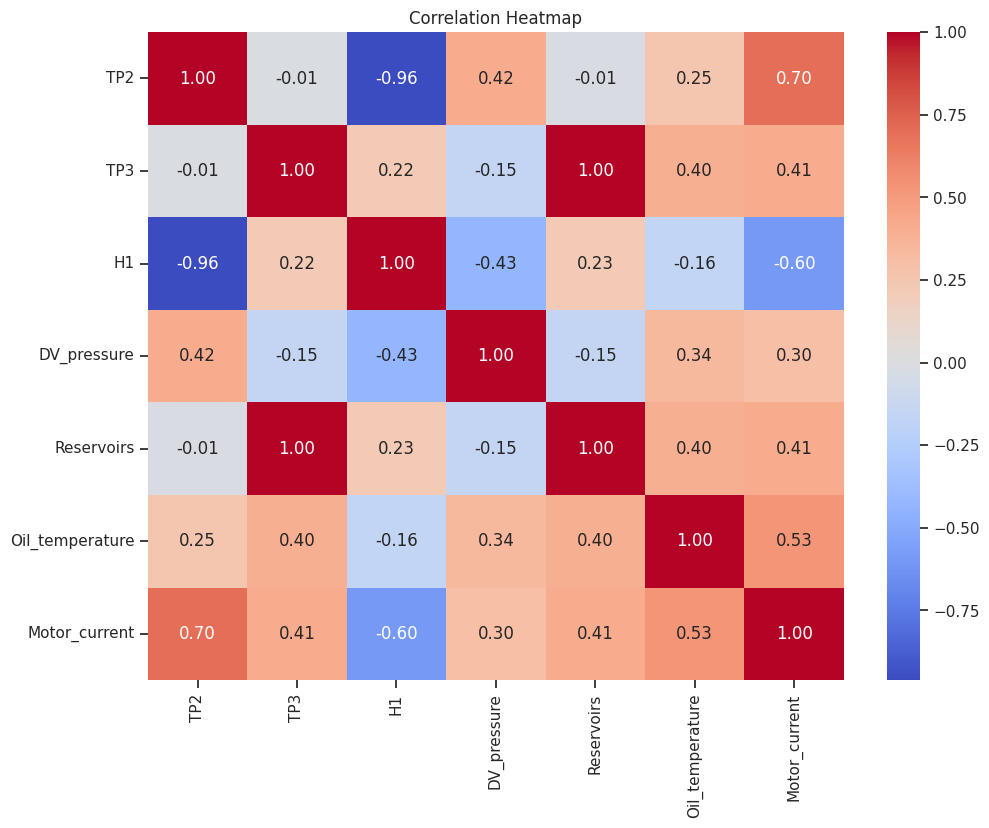

In [25]:
# Define numerical columns for correlation analysis
numerical_columns = ['TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs', 'Oil_temperature', 'Motor_current']

# Calculate the correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

The above heat map display the correlation heatmap for the specified numerical columns.

## 3.5  EDA FOR BINARY COLUMNS (SENSORS)


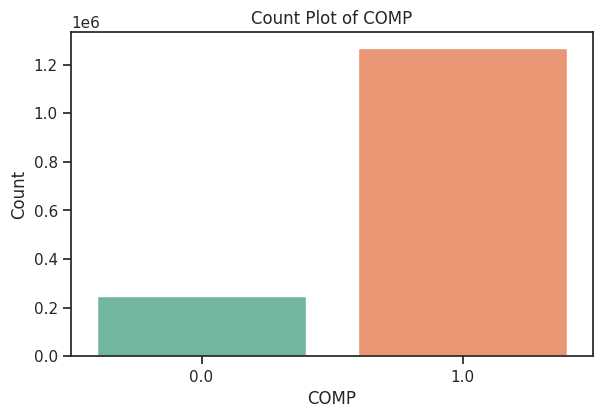

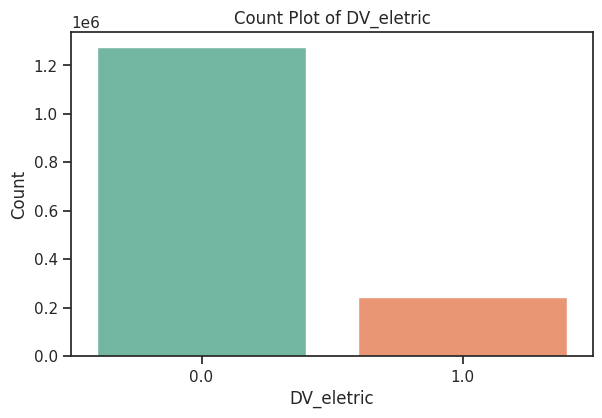

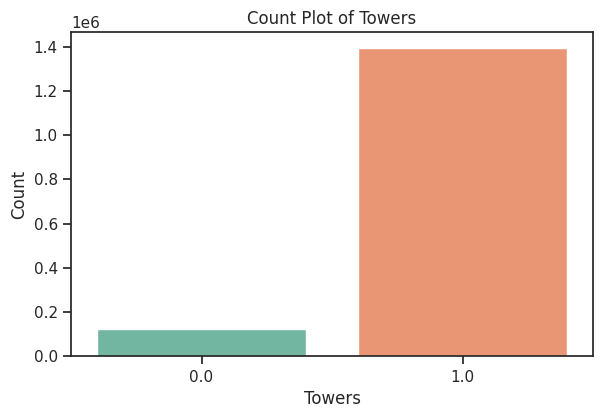

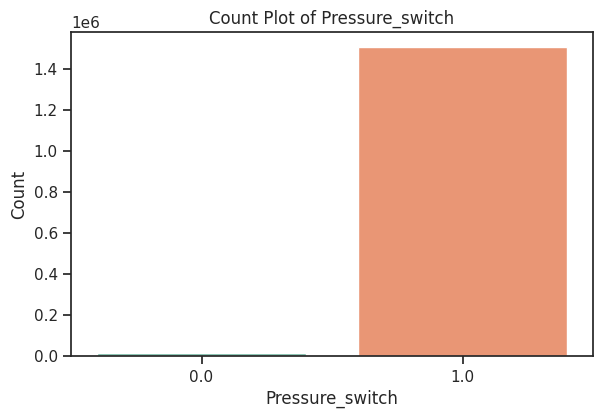

In [26]:
categorical_columns = ['COMP', 'DV_eletric', 'Towers', 'Pressure_switch']
for col in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, palette='Set2')
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

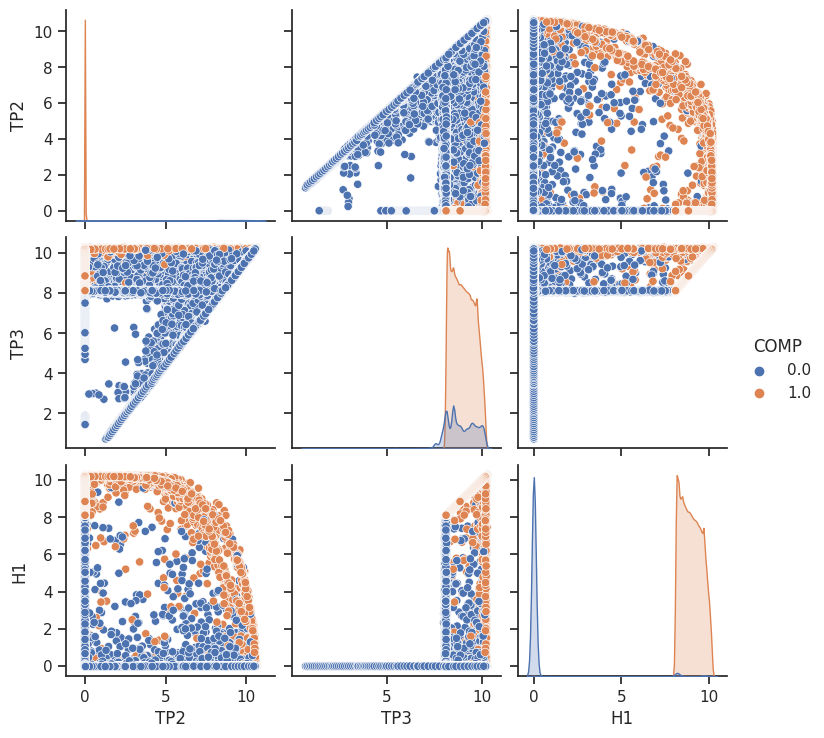

In [27]:
# Pairplot with hue (color-coding by a categorical variable)
sns.pairplot(df[['TP2', 'TP3', 'H1', 'COMP']], hue='COMP')
plt.show()


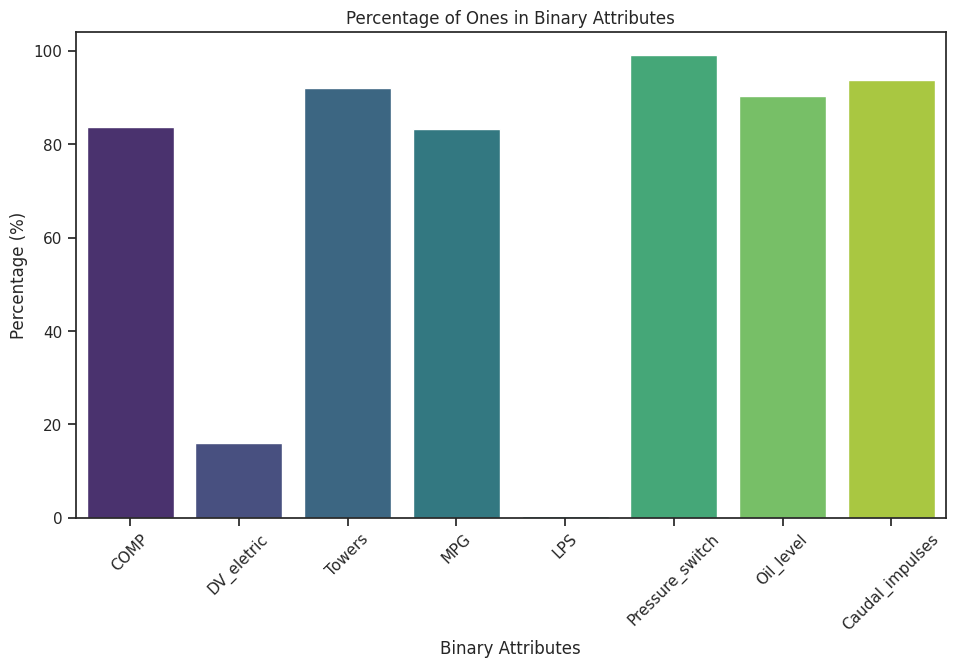

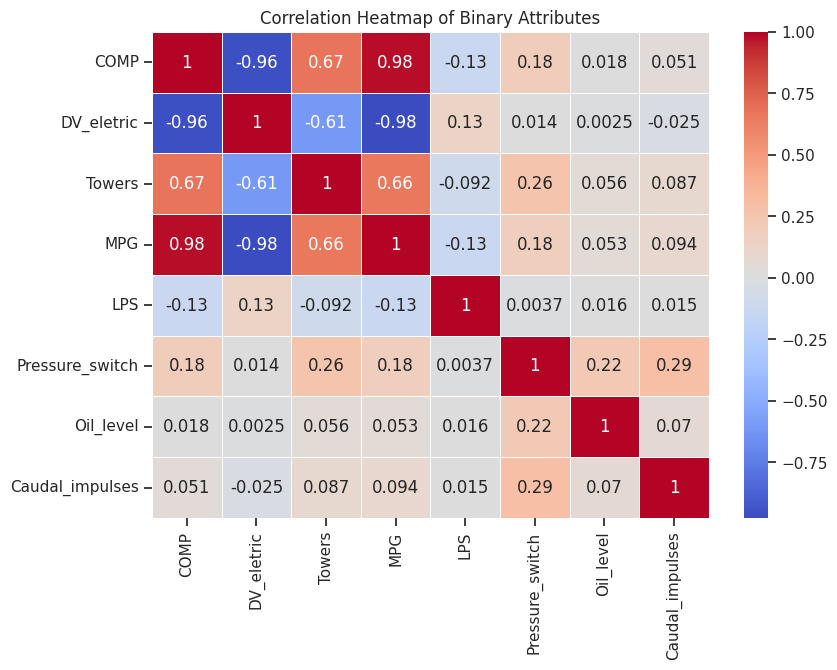

In [29]:
binary_columns = ['COMP', 'DV_eletric', 'Towers', 'MPG', 'LPS', 'Pressure_switch', 'Oil_level', 'Caudal_impulses']

# Calculate the percentage of ones (1s) in each binary column
percentage_ones = df[binary_columns].mean() * 100

# Plot a bar chart for the percentage of ones
plt.figure(figsize=(10, 6))
sns.barplot(x=percentage_ones.index, y=percentage_ones.values, palette='viridis')
plt.title('Percentage of Ones in Binary Attributes')
plt.xlabel('Binary Attributes')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.show()


# Correlation Analysis
correlation_matrix = df[binary_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Binary Attributes')
plt.show()


# Some Generalized Insights and Conclusions

## 1. Pressure Columns:
   - TP2, TP3, H1, and Reservoirs seem to have similar distributions with varying ranges.
   - DV_pressure has a lot of zero values, indicating that the compressor is often operating under load.

## 2. Oil Temperature:
   - The oil temperature appears to follow a roughly normal distribution.
   - There are no extreme outliers.

## 3. Motor Current:
   - Motor_current is primarily clustered around 4A (working offloaded) and 7A (working under load).

## 4. Categorical Columns:
   - COMP and DV_eletric columns have binary values, indicating on/off states.
   - Towers and Pressure_switch have multiple categories, with varying frequencies.

## 5. Correlation Heatmap:
   - There is no strong correlation between numerical columns, indicating independence.

# 4. Preprocessing

Checking for null values

In [30]:
df.isna().sum()

Unnamed: 0         0
timestamp          0
TP2                0
TP3                0
H1                 0
DV_pressure        0
Reservoirs         0
Oil_temperature    0
Motor_current      0
COMP               0
DV_eletric         0
Towers             0
MPG                0
LPS                0
Pressure_switch    0
Oil_level          0
Caudal_impulses    0
dtype: int64

Checking correlation

<Axes: >

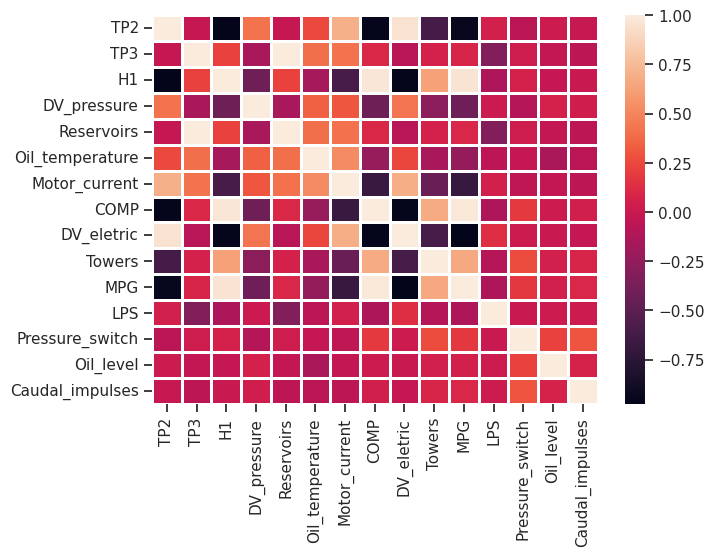

In [31]:
new_df = df[["TP2" ,"TP3",  "H1",  "DV_pressure",  "Reservoirs",  "Oil_temperature",  "Motor_current", "COMP",  "DV_eletric",  "Towers", "MPG", "LPS", "Pressure_switch", "Oil_level", "Caudal_impulses"]]
sns.heatmap(data=new_df.corr(), lw = 1)

In [32]:
correlation_matrix = df.corr()
print(correlation_matrix)

<ipython-input-32-becb50483c66>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


                 Unnamed: 0       TP2       TP3        H1  DV_pressure  \
Unnamed: 0         1.000000  0.053675  0.006159 -0.051114    -0.010821   
TP2                0.053675  1.000000 -0.011161 -0.961269     0.415025   
TP3                0.006159 -0.011161  1.000000  0.224867    -0.153074   
H1                -0.051114 -0.961269  0.224867  1.000000    -0.425513   
DV_pressure       -0.010821  0.415025 -0.153074 -0.425513     1.000000   
Reservoirs         0.006056 -0.012403  0.999993  0.226037    -0.153080   
Oil_temperature    0.458565  0.250710  0.401616 -0.161810     0.339697   
Motor_current      0.121680  0.697480  0.413756 -0.600178     0.302160   
COMP              -0.056982 -0.955521  0.103295  0.971419    -0.423992   
DV_eletric         0.051159  0.947396 -0.078428 -0.958663     0.427813   
Towers            -0.031462 -0.616405  0.064937  0.628964    -0.285256   
MPG               -0.055590 -0.941250  0.088343  0.954307    -0.417284   
LPS                0.026820  0.057651 

We will drop the 'Reservoirs' column as it has correlation almost equal to 1.

In [33]:
df = df.drop(columns=['Reservoirs'])

Dropping 'Unnamed: 0' column

In [34]:
df = df.drop(columns='Unnamed: 0')

Converting timestamp datatype to datetime and setting it as the index column.

In [35]:
df['timestamp'] = pd.to_datetime(df['timestamp'])


In [36]:
df = df.set_index('timestamp', inplace=True)


# 4. Model Training
##4.1 Linear Regression


In [51]:
df['Lag_1'] = df['Oil_temperature'].shift(1)
df.head()

,TP2,TP3,H1,DV_pressure,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,Lag_1
timestamp,,,,,,,,,,,,,,,
2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,NaN
2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,53.600
2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,53.675
2020-02-01 00:00:29,-0.012,9.328,9.312,-0.022,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,53.600
2020-02-01 00:00:39,-0.012,9.318,9.302,-0.022,53.475,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,53.425


In [52]:
df = df.drop(df.index[0])


In [53]:
# Calculate the number of data points for each split
total_samples = len(df)
train_samples = int(0.7 * total_samples)
val_samples = int(0.15 * total_samples)

# Split the data into training, validation, and test sets
train_data = df.iloc[:train_samples]
val_data = df.iloc[train_samples:train_samples + val_samples]
test_data = df.iloc[train_samples + val_samples:]

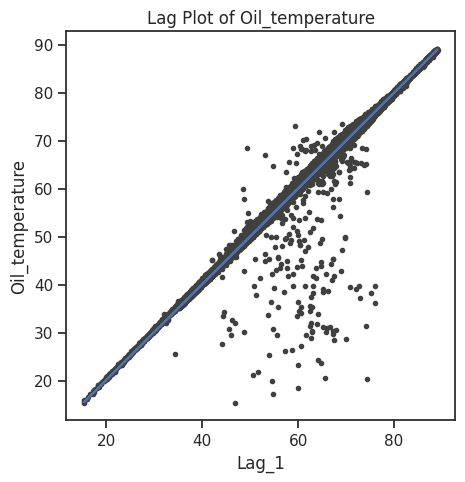

In [69]:
fig, ax = plt.subplots()
ax.plot(X['Lag_1'], y, '.', color='0.25')
ax.plot(X['Lag_1'], y_pred)
ax.set_aspect('equal')
ax.set_ylabel('Oil_temperature')
ax.set_xlabel('Lag_1')
ax.set_title('Lag Plot of Oil_temperature');

As the graph between oil temperature and lag is linear, we can perform regression by taking lag as the input and oil temperature as output.

In [54]:
Y_train = train_data['Oil_temperature']
X_train = train_data[['Lag_1']]
Y_val = val_data['Oil_temperature']
X_val = val_data[['Lag_1']]
Y_test = test_data['Oil_temperature']
X_test = test_data[['Lag_1']]

In [55]:
from sklearn import preprocessing
size_scaler_train = preprocessing.StandardScaler().fit(X_train)
size_scaler_val = preprocessing.StandardScaler().fit(X_val)
size_scaler_test = preprocessing.StandardScaler().fit(X_test)
X_train_scaled = size_scaler_train.transform(X_train)
X_val_scaled = size_scaler_val.transform(X_val)
X_test_scaled = size_scaler_test.transform(X_test)

LinearRegression 0.37859489752553 0.17448260327505666 {}
LinearRegression 4.776626623098719 4.0852603386932875 {}


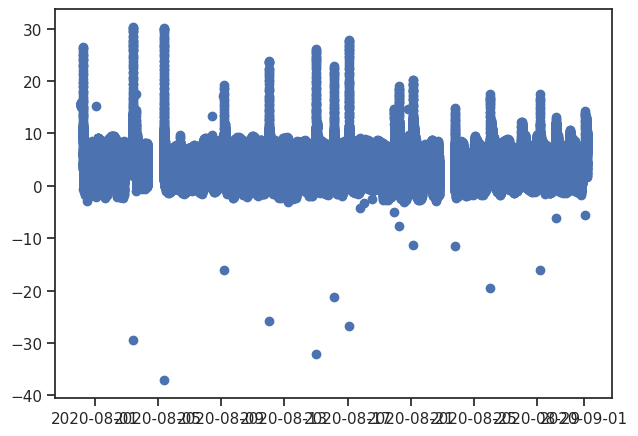

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Models-------------------------
from sklearn.linear_model import LinearRegression
model_dict = {
    'LinearRegression': {"model": LinearRegression(), "params": {}}
    }

def eval_models():
    model_results = pd.DataFrame()
    model_results['Train_RMSE'] = None
    model_results['Test_RMSE'] = None
    model_results['Train_MAE'] = None
    model_results['Test_MAE'] = None
    model_results['best_params'] = None

    best_reg_model_ours = None
    best_test_score = math.inf

    for model_name, reg_model in model_dict.items():
        classifier = GridSearchCV(reg_model['model'], reg_model['params'], n_jobs=20, verbose=0)
        classifier.fit(X_train_scaled, Y_train)
        best_model = classifier.best_estimator_

        y_train_predicted = best_model.predict(X_train_scaled)
        train_rmse = np.sqrt(mean_squared_error(Y_train, y_train_predicted))
        train_mae = mean_absolute_error(Y_train, y_train_predicted)

        print(model_name, train_rmse, train_mae, classifier.best_params_)

        y_predicted = best_model.predict(X_test_scaled)
        test_rmse = np.sqrt(mean_squared_error(Y_test, y_predicted))
        test_mae = mean_absolute_error(Y_test, y_predicted)

        print(model_name, test_rmse, test_mae, classifier.best_params_)

        if test_rmse < best_test_score:
            best_test_score = test_rmse
            best_reg_model_ours = best_model

        model_results.loc[model_name, ['Train_RMSE', 'Test_RMSE', 'Train_MAE', 'Test_MAE', 'best_params']] = [train_rmse, test_rmse, train_mae, test_mae, classifier.best_params_]

    # plot the prediction errors using the best model
    y_predicted = best_model.predict(X_test_scaled)
    plt.plot(Y_test - y_predicted, marker='o', linestyle='')

    return model_results
model_results = eval_models()

In [57]:
from sklearn.linear_model import LinearRegression

X = df.loc[:, ['Lag_1']]
X.dropna(inplace=True)  # drop missing values in the feature set
y = df.loc[:, 'Oil_temperature']  # create the target
y, X = y.align(X, join='inner')  # drop corresponding values in target

model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

In [59]:
df['Time'] = np.arange(len(df.index))

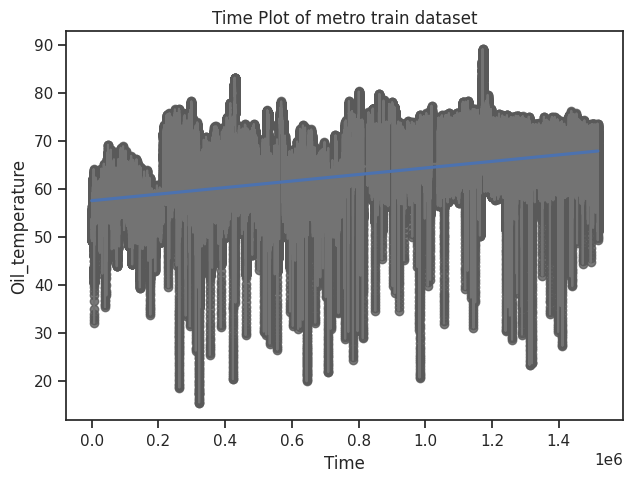

In [60]:
fig, ax = plt.subplots()
ax.plot('Time', 'Oil_temperature', data=df, color='0.45')
ax = sns.regplot(x='Time', y='Oil_temperature', data=df, ci=None, scatter_kws=dict(color='0.35'))
ax.set_title('Time Plot of metro train dataset');

Now, performing normal regression with all features as the input.

In [61]:
Y_train = train_data['Oil_temperature']
X_train = train_data.drop(columns='Oil_temperature')
Y_val = val_data['Oil_temperature']
X_val = val_data.drop(columns='Oil_temperature')
Y_test = test_data['Oil_temperature']
X_test = test_data.drop(columns='Oil_temperature')

In [ ]:
df.dtypes

In [63]:
size_scaler_train = preprocessing.StandardScaler().fit(X_train)
size_scaler_val = preprocessing.StandardScaler().fit(X_val)
size_scaler_test = preprocessing.StandardScaler().fit(X_test)
X_train_scaled = size_scaler_train.transform(X_train)
X_val_scaled = size_scaler_val.transform(X_val)
X_test_scaled = size_scaler_test.transform(X_test)

In [64]:
print(X_train_scaled.shape,X_val_scaled.shape, X_test_scaled.shape)

(1061862, 14) (227542, 14) (227543, 14)


In [65]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Models-------------------------
from sklearn.linear_model import LinearRegression

In [66]:
model_dict = {
    'LinearRegression': {"model": LinearRegression(), "params": {}}
    }

In [67]:
def eval_models():
    model_results = pd.DataFrame()
    model_results['Train_RMSE'] = None
    model_results['Test_RMSE'] = None
    model_results['Train_MAE'] = None
    model_results['Test_MAE'] = None
    model_results['best_params'] = None

    best_reg_model_ours = None
    best_test_score = math.inf

    for model_name, reg_model in model_dict.items():
        classifier = GridSearchCV(reg_model['model'], reg_model['params'], n_jobs=20, verbose=0)
        classifier.fit(X_train_scaled, Y_train)
        best_model = classifier.best_estimator_

        y_train_predicted = best_model.predict(X_train_scaled)
        train_rmse = np.sqrt(mean_squared_error(Y_train, y_train_predicted))
        train_mae = mean_absolute_error(Y_train, y_train_predicted)

        print(model_name, train_rmse, train_mae, classifier.best_params_)

        y_predicted = best_model.predict(X_test_scaled)
        test_rmse = np.sqrt(mean_squared_error(Y_test, y_predicted))
        test_mae = mean_absolute_error(Y_test, y_predicted)

        print(model_name, test_rmse, test_mae, classifier.best_params_)

        if test_rmse < best_test_score:
            best_test_score = test_rmse
            best_reg_model_ours = best_model

        model_results.loc[model_name, ['Train_RMSE', 'Test_RMSE', 'Train_MAE', 'Test_MAE', 'best_params']] = [train_rmse, test_rmse, train_mae, test_mae, classifier.best_params_]

    # plot the prediction errors using the best model
    y_predicted = best_model.predict(X_test_scaled)
    plt.plot(Y_test - y_predicted, marker='o', linestyle='')

    return model_results

LinearRegression 0.3307897290079795 0.15815107022252536 {}
LinearRegression 4.758201657596583 4.078362797598104 {}


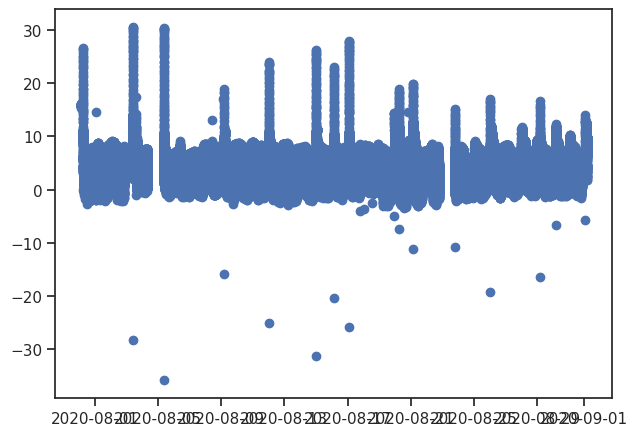

In [68]:
model_results = eval_models()

## 4.2. Error/Anomaly Prediction
###using IQR analysis and Logistic Regression

In [70]:
from sklearn.preprocessing import RobustScaler

In [73]:
df2 = pd.read_csv('data/MetroPT3(AirCompressor).csv.zip')
df2.head()

,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
0,0,2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1,10,2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2,20,2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
3,30,2020-02-01 00:00:29,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
4,40,2020-02-01 00:00:39,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


In [76]:
rob_scaler = RobustScaler()
for column_name in ['TP2','TP3','H1','DV_pressure','Reservoirs','Oil_temperature','Motor_current']:
  df2[column_name] = rob_scaler.fit_transform(df2[column_name].values.reshape(-1,1))

In [77]:
df2.shape

(1516948, 17)

Code to fnd outliers using IQR

In [81]:
outliers_columns = ['TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs', 'Oil_temperature', 'Motor_current']

# Initialize 'Anamoly' column with False values
df2['Anamoly'] = False

for column_name in outliers_columns:
    Q1 = df2[column_name].quantile(0.25)
    Q3 = df2[column_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df2['Anamoly'] = ((df2[column_name] < lower_bound) | (df2[column_name] > upper_bound)) | df2['Anamoly']

# Now, 'Anamoly' column has been updated based on outlier detection logic


In [82]:
df2['Anamoly'].value_counts()

False    1211747
True      305201
Name: Anamoly, dtype: int64

In [83]:
df2 = df2.drop(columns=['timestamp'])
df2 = df2.drop(columns=['Unnamed: 0'])

In [84]:
# Calculate the number of data points for each split
total_samples = len(df)
train_samples = int(0.80 * total_samples)

# Split the data into training, validation, and test sets
train_data = df2.iloc[:train_samples]
test_data = df2.iloc[train_samples:]


In [85]:
Y_train = train_data['Anamoly']
X_train = train_data[['TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs', 'Oil_temperature', 'Motor_current', 'COMP', 'DV_eletric', 'Towers', 'MPG', 'LPS', 'Pressure_switch', 'Oil_level', 'Caudal_impulses']]
Y_test = test_data['Anamoly']
X_test = test_data[['TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs', 'Oil_temperature', 'Motor_current', 'COMP', 'DV_eletric', 'Towers', 'MPG', 'LPS', 'Pressure_switch', 'Oil_level', 'Caudal_impulses']]

In [86]:
X_test

,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
1213557,2319.0,-0.108,-7.851786,2.0,-0.112224,0.319261,1.570007,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
1213558,2364.5,0.092,-7.850000,2.0,0.088176,0.445910,1.578633,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
1213559,2016.0,0.242,-7.850000,2.0,0.240481,0.551451,1.480425,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0
1213560,2436.0,0.370,-7.848214,2.0,0.366733,0.667546,1.567352,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0
1213561,2484.5,0.572,-7.848214,2.5,0.571142,0.794195,1.571997,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516943,-0.5,-0.042,0.108929,-0.5,-0.042084,-0.319261,-0.000664,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1516944,-0.5,-0.056,0.092857,0.0,-0.056112,-0.327177,0.000000,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1516945,-0.5,-0.070,0.082143,-0.5,-0.068136,-0.327177,-0.000664,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1516946,0.0,-0.084,0.071429,-0.5,-0.082164,-0.332454,0.000000,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


In [87]:
# modeling
from sklearn.linear_model import LogisticRegression
# model validation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [88]:
# instantiate model
model = LogisticRegression(max_iter=100000)
# fit
model.fit(X_train, Y_train)
# predict
prediction = model.predict(X_test)

In [89]:
classification_report = classification_report(Y_test, prediction)
confusion_matrix = confusion_matrix(Y_test, prediction)
print("CLASSIFICATION REPORT")
print(classification_report)
print("CONFUSION MATRIX")
print(confusion_matrix)

CLASSIFICATION REPORT
              precision    recall  f1-score   support

       False       0.97      1.00      0.99    257085
        True       1.00      0.84      0.91     46306

    accuracy                           0.98    303391
   macro avg       0.99      0.92      0.95    303391
weighted avg       0.98      0.98      0.97    303391

CONFUSION MATRIX
[[257061     24]
 [  7346  38960]]
